In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Wine 이진 분류
- 와인 품질 데이터셋을 가공한 레드/화이트 와인 이진분류 데이터셋
   - 0: 레드와인, 1: 화이트와인

In [4]:
wine_df = pd.read_csv('../../data/wine_simple.csv')

In [10]:
wine_df.head(5)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [13]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [15]:
# 데이터 분리 및 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = wine_df.drop('class', axis=1)
y = wine_df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
# 모델 학습 및 평가
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(x_train, y_train)

dt_clf.score(x_train, y_train), dt_clf.score(x_test, y_test)

(0.8433908045977011, 0.8584615384615385)

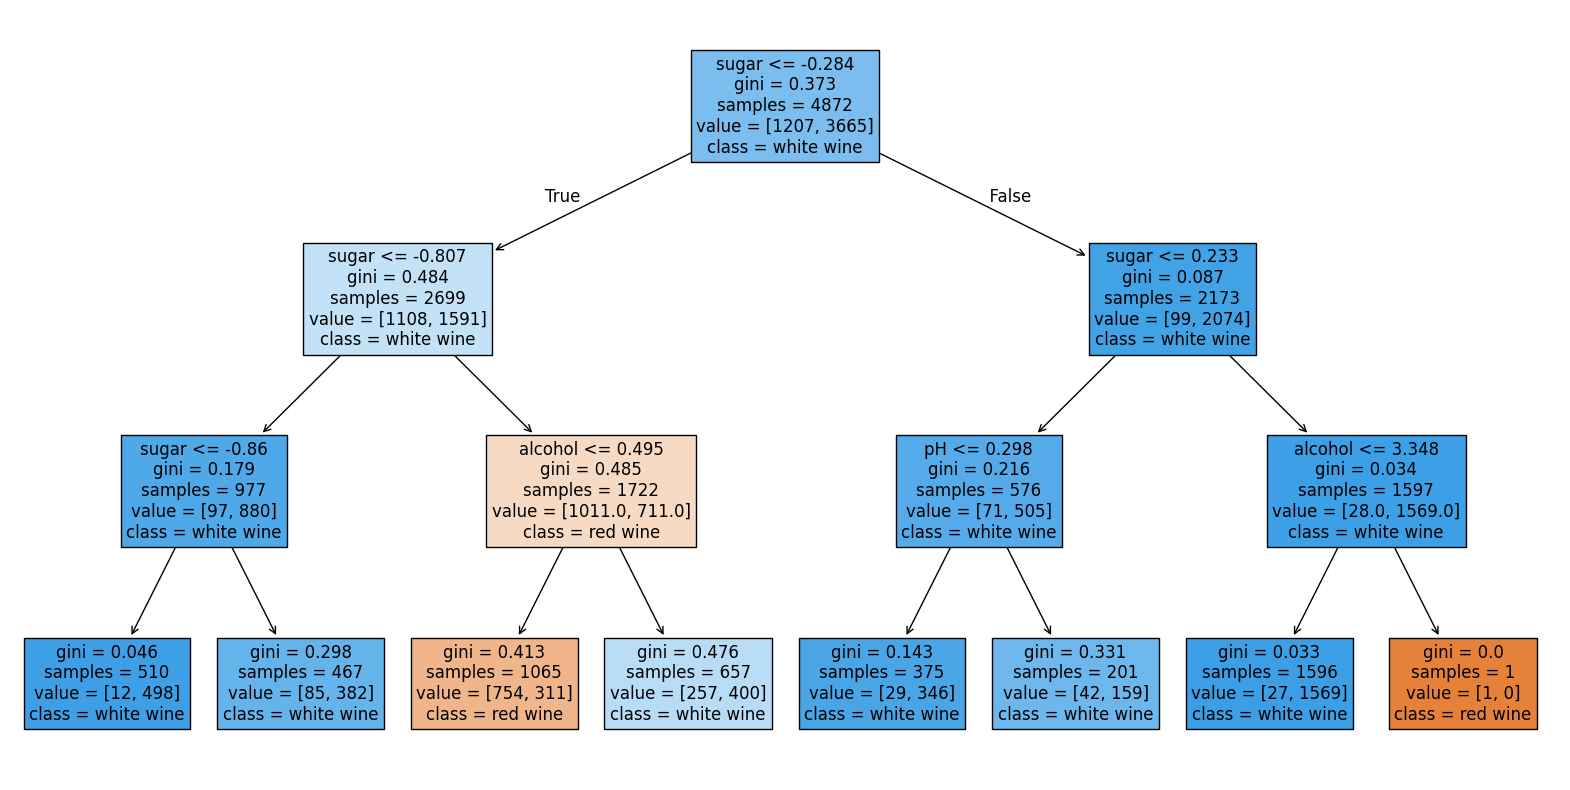

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_clf,
    filled=True,                            # 색 채우기 (특정 클래스 비율 높을수록 진하게, 지니계수 낮을수록 진하게)
    feature_names=x.columns,                # 특성 이름
    class_names=['red wine', 'white wine'], # 클래스 이름
    max_depth=3,
    fontsize=12
)
plt.savefig('wine_simple.png')
plt.show()

<BarContainer object of 3 artists>

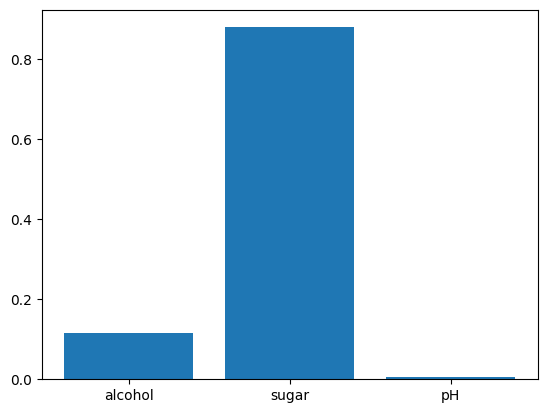

In [43]:
# 특성 중요도
x.columns, dt_clf.feature_importances_
plt.bar(x.columns, dt_clf.feature_importances_)

##### iris 다중분류

In [ ]:
# 데이터 준비
from sklearn.datasets import load_iris
iris_df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)

x_test, x_train, y_test, y_train = train_test_split(
    iris_df, load_iris().target, test_size=0.2, random_state=0
)


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)

dt_clf.fit(x_train, y_train)
dt_clf.score(x_train, y_train), dt_clf.score(x_test, y_test)
plt.figure(figsize=(20,10))

[Text(0.3333333333333333, 0.875, 'petal width (cm) <= 0.7\ngini = 0.638\nsamples = 30\nvalue = [11, 13, 6]\nclass = versicolor'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]\nclass = setosa'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal length (cm) <= 4.75\ngini = 0.432\nsamples = 19\nvalue = [0, 13, 6]\nclass = versicolor'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.375, 'sepal length (cm) <= 6.55\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]\nclass = virginica'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = virginica'),
 Text(0.8333333333333334, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor')]

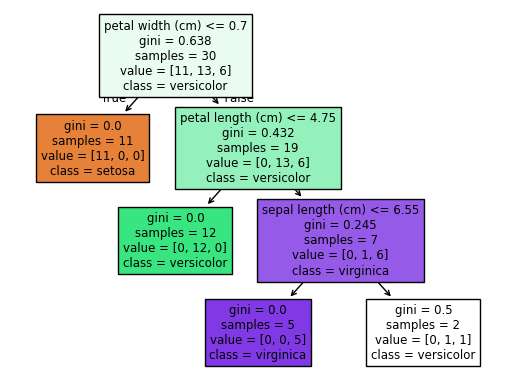

In [ ]:
# 트리 시각화

plt.figure(figsize=(20,10))
plot_tree(
    dt_clf,
    filled=True,                            # 색 채우기 (특정 클래스 비율 높을수록 진하게, 지니계수 낮을수록 진하게)
    feature_names=x.columns,                # 특성 이름
    class_names=iris # 클래스 이름
    max_depth=3,
    fontsize=12
)
plt.savefig('wine_simple.png')
plt.show()
)

# DecisionTreeRegressor - 회귀
- 각 노드에서 MSE를 최소화하는 방향으로 노드 분할
- 최종 노드에서는 각 샘플들의 평균값을 계산해 예측값으로 사용

In [51]:
# 데이터 로드
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

In [ ]:
housing_df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(housing_df, housing_data.target, random_state=0)

housing_df.columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [66]:
# 모델 훈련 및 평가
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 학습
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=10)
dt_reg.fit(x_train, y_train)

# 예측
pred_train = dt_reg.predict(x_train)
pred_test = dt_reg.predict(x_test)

# 평가
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f"훈련데이터 MSE: {mse_train:.6f}, R^2: {r2_train:.6f}")
print(f"테스트데이터 MSE: {mse_test:.6f}, R^2: {r2_test:.6f}")

훈련데이터 MSE: 0.217569, R^2: 0.836984
테스트데이터 MSE: 0.427835, R^2: 0.676337


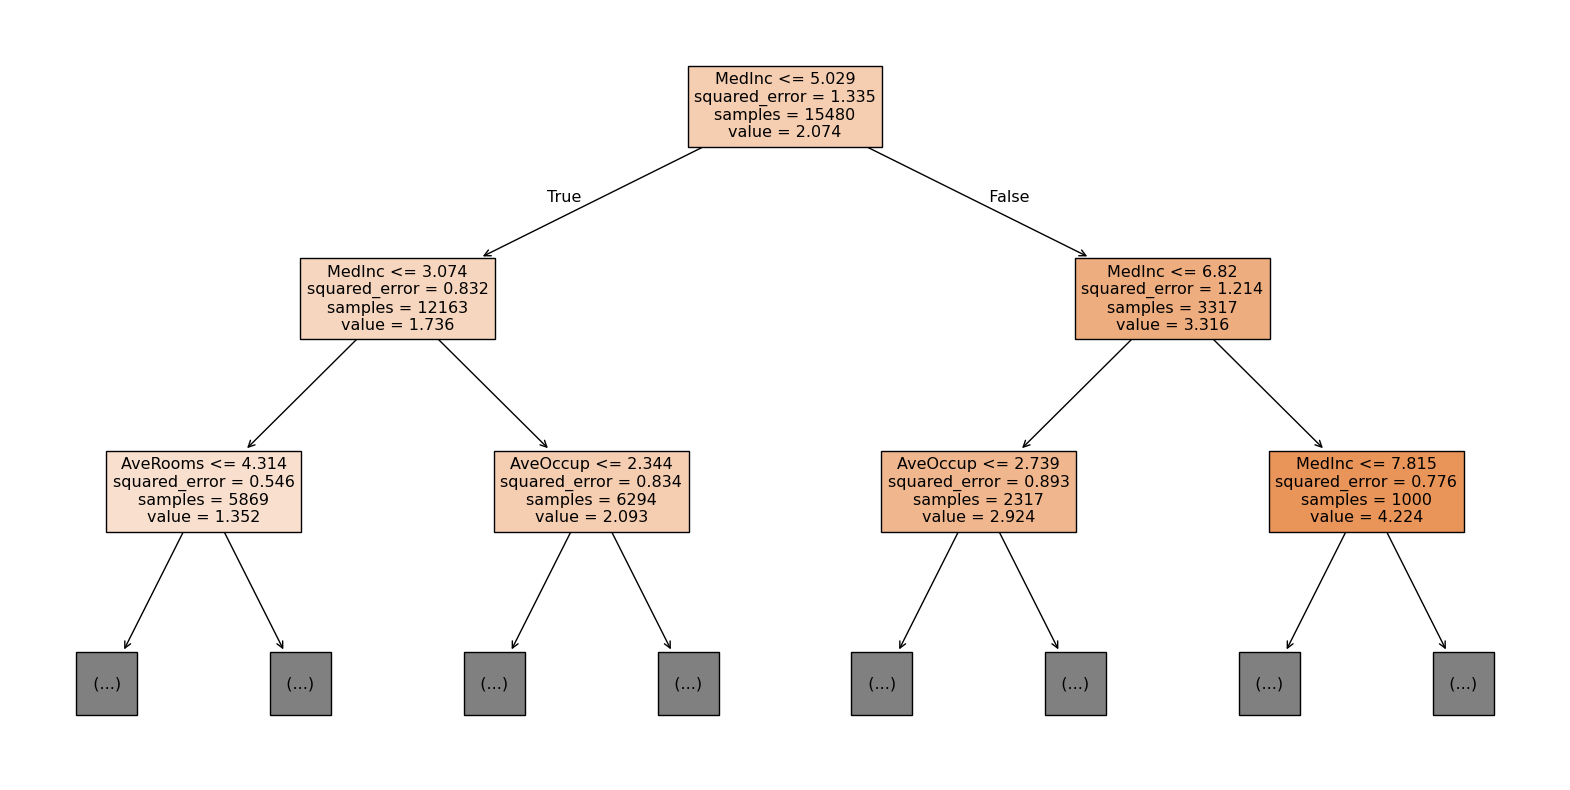

In [ ]:
# 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))

# 실제 dt_reg는 max depth가 10이지만 plot에선 2까지만 표시
plot_tree(dt_reg, filled=True,
          feature_names=housing_df.columns,
          max_depth=2)

plt.show()

In [69]:
dt_reg.feature_importances_

array([0.61142957, 0.04479459, 0.03445471, 0.01282351, 0.01652131,
       0.13110284, 0.07239124, 0.07648224])